In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import mean_absolute_error as mae
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.preprocessing import StandardScler, MinMaxScaler

In [2]:
data = pd.read_excel(r"Downloads\dataset.xlsx")
data.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7307142186,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590.0,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7307033878,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,20000.0,2011.0,ford,f-150 king ranch 4x4,good,8 cylinders,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7306701617,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,26990.0,2015.0,lexus,nx 200t sport utility 4d,good,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7306676175,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27590.0,2016.0,lexus,nx 200t sport utility 4d,good,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7306676124,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22990.0,2020.0,buick,encore gx select sport,good,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7306625443,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,36990.0,2018.0,jaguar,e-pace p250 se sport,good,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(25058, 126)

In [4]:
data.isna().sum()

id                  0
url                59
region              0
region_url          0
price               0
                ...  
Unnamed: 121    25034
Unnamed: 122    25053
Unnamed: 123    25039
Unnamed: 124    25039
Unnamed: 125    25039
Length: 126, dtype: int64

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,NaN,fwd,mid-size,mini-van,blue,https://images.craigslist.org/00w0w_41YO8cHlW3...,2003 Chrysler Town and Country Handicapped Acc...,NaN,al,32.6142,-85.3264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,1GKKNLLS2JZ178034,fwd,NaN,other,white,https://images.craigslist.org/00c0c_kXhBir3Ii6...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,gas,61087.0,clean,other,3LN6L2G99DR819673,fwd,NaN,sedan,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,gas,18041.0,clean,other,1GKKNMLS2HZ305977,fwd,NaN,other,NaN,https://images.craigslist.org/00w0w_b3G8mxfApI...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,Na

In [6]:
df = data.iloc[:,:25]
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,NaN,fwd,mid-size,mini-van,blue,https://images.craigslist.org/00w0w_41YO8cHlW3...,2003 Chrysler Town and Country Handicapped Acc...,NaN,al,32.6142,-85.3264
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,1GKKNLLS2JZ178034,fwd,NaN,other,white,https://images.craigslist.org/00c0c_kXhBir3Ii6...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,gas,61087.0,clean,other,3LN6L2G99DR819673,fwd,NaN,sedan,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,gas,18041.0,clean,other,1GKKNMLS2HZ305977,fwd,NaN,other,NaN,https://images.craigslist.org/00w0w_b3G8mxfApI...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
4,7307142186,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590.0,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,gas,36436.0,clean,other,3LN6L5A97HR666209,fwd,NaN,sedan,NaN,https://images.craigslist.org/00F0F_ghX7UUlnBr...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25053,7304776908,https://chico.craigslist.org/ctd/d/chico-2018-...,chico,https://chico.craigslist.org,24990.0,2018.0,toyota,camry xse sedan 4d,good,NaN,gas,27917.0,clean,other,4T1B61HK2JU105986,fwd,NaN,sedan,black,https://images.craigslist.org/00h0h_1Pt94GqHqc...,Carvana is the safer way to buy a car During t...,NaN,ca,39.71,-121.81
25054,7304777952,https://chico.craigslist.org/ctd/d/sacramento-...,chico,https://chico.craigslist.org,20777.0,2013.0,ford,expedition,NaN,NaN,gas,107614.0,clean,automatic,1FMJK2A56DEF70027,4wd,NaN,SUV,silver,https://images.craigslist.org/00M0M_6GJ1StmAhF...,2013 Ford Expedition EL Limited 4x4 4dr SUV ...,NaN,ca,38.605,-121.402
25055,7304777690,https://chico.craigslist.org/ctd/d/sacramento-...,chico,https://chico.craigslist.org,10997.0,2014.0,toyota,prius v,NaN,NaN,gas,159052.0,clean,automatic,JTDZN3EUXEJ004127,fwd,NaN,wagon,white,https://images.craigslist.org/00l0l_fZqP6WOaJC...,2014 Toyota Prius v Three 4dr Wagon Offere...,NaN,ca,38.605,-121.402
25056,7304777270,https://chico.craigslist.org/ctd/d/sacramento-...,chico,https://chico.craigslist.org,28777.0,2014.0,cadillac,escalade,NaN,NaN,gas,105284.0,clean,automatic,1GYS4CEFXER160489,4wd,NaN,SUV,white,https://images.craigslist.org/01515_23ptD1zba2...,2014 Cadillac Escalade Premium AWD 4dr SUV ...,NaN,ca,38.605,-121.402


In [7]:
df.shape

(25058, 25)

In [8]:
df.isna().sum()

id                  0
url                59
region              0
region_url          0
price               0
year              176
manufacturer     1163
model             392
condition       10653
cylinders       10030
fuel              229
odometer          277
title_status      397
transmission      144
VIN              9471
drive            7015
size            18182
type             5218
paint_color      6357
image_url          64
description        64
county          24273
state            2207
lat              3126
long             4378
dtype: int64

In [9]:
df.corr()

,price,year,odometer
price,1.000000,0.270301,-0.000952
year,0.270301,1.000000,0.000806
odometer,-0.000952,0.000806,1.000000


In [10]:
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')


In [11]:
df.describe()

,price,year,odometer
count,25058.000000,24882.000000,2.478100e+04
mean,19874.093059,2012.037216,1.789077e+05
std,16247.399510,9.813222,1.271424e+07
min,-121.271690,1903.000000,0.000000e+00
25%,7500.000000,2010.000000,3.160100e+04
50%,16991.000000,2015.000000,7.364300e+04
75%,28977.750000,2018.000000,1.210000e+05
max,244995.000000,2022.000000,2.000799e+09


In [12]:
len(df)

25058

In [13]:
thresh = len(df)*0.4
thresh

10023.2

In [14]:
cols = df.columns
for col in cols:
        non_null = df[col].isna().sum()
        print(non_null)

0
59
0
0
0
176
1163
392
10653
10030
229
277
397
144
9471
7015
18182
5218
6357
64
64
24273
2207
3126
4378


In [15]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [16]:
cols = df.columns
remove = []
for col in cols:
    non_null = df[col].isna().sum()
    if non_null >= thresh:
        remove.append(col)
        print(remove)

['condition']
['condition', 'cylinders']
['condition', 'cylinders', 'size']
['condition', 'cylinders', 'size', 'county']


In [17]:
def remove_cols(df):
    thresh = len(df) * 0.4
    cols = df.columns
    remove = []
    for col in cols:
        non_null = df[col].isna().sum()
        if non_null >= thresh:
            remove.append(col)
        return remove
            
rd_cols = remove_cols(df)
df = df.drop(rd_cols, axis = 1)
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,NaN,fwd,mid-size,mini-van,blue,https://images.craigslist.org/00w0w_41YO8cHlW3...,2003 Chrysler Town and Country Handicapped Acc...,NaN,al,32.6142,-85.3264
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,1GKKNLLS2JZ178034,fwd,NaN,other,white,https://images.craigslist.org/00c0c_kXhBir3Ii6...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,gas,61087.0,clean,other,3LN6L2G99DR819673,fwd,NaN,sedan,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,gas,18041.0,clean,other,1GKKNMLS2HZ305977,fwd,NaN,other,NaN,https://images.craigslist.org/00w0w_b3G8mxfApI...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
4,7307142186,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590.0,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,gas,36436.0,clean,other,3LN6L5A97HR666209,fwd,NaN,sedan,NaN,https://images.craigslist.org/00F0F_ghX7UUlnBr...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
5,7307033878,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,20000.0,2011.0,ford,f-150 king ranch 4x4,good,8 cylinders,gas,101000.0,clean,automatic,NaN,4wd,NaN,pickup,black,https://images.craigslist.org/00u0u_YKZ9jC21Iz...,2011 Ford F-150 King Ranch 4x4 with V8. Loaded...,NaN,al,32.5475,-85.4682
6,7306701617,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,26990.0,2015.0,lexus,nx 200t sport utility 4d,good,NaN,gas,29738.0,clean,other,JTJYARBZ9F2013419,fwd,NaN,hatchback,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
7,7306676175,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27590.0,2016.0,lexus,nx 200t sport utility 4d,good,NaN,gas,31363.0,clean,other,JTJYARBZ5G2041512,fwd,NaN,hatchback,white,https://images.craigslist.org/00J0J_7FX8tlOfh4...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
8,7306676124,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22990.0,2020.0,buick,encore gx select sport,good,NaN,other,5144.0,clean,other,KL4MMDSL8LB104338,NaN,NaN,other,red,https://images.craigslist.org/01515_6T99zf3Uux...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48
9,7306625443,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,36990.0,2018.0,jaguar,e-pace p250 se sport,good,NaN,gas,8490.0,clean,other,SADFP2FX0J1Z05358,NaN,NaN,other,black,https://images.craigslist.org/01717_3GkMIx6q3F...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48


In [18]:
df.nunique()

id              25057
url             24998
region             30
region_url         31
price            3250
year               98
manufacturer       40
model            5195
condition           6
cylinders           8
fuel                5
odometer        12658
title_status        6
transmission        3
VIN              9970
drive               3
size                4
type               13
paint_color        12
image_url       17670
description     21084
county            568
state             308
lat              3018
long             3030
dtype: int64

In [19]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [22]:
remove_columns = ['id', 'url', 'region','region_url', 'image_url','description','state']
df = df.drop(remove_columns, axis=1)
df.head(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,county,lat,long
0,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,NaN,fwd,mid-size,mini-van,blue,NaN,32.6142,-85.3264
1,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,1GKKNLLS2JZ178034,fwd,NaN,other,white,NaN,32.59,-85.48
2,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,gas,61087.0,clean,other,3LN6L2G99DR819673,fwd,NaN,sedan,red,NaN,32.59,-85.48
3,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,gas,18041.0,clean,other,1GKKNMLS2HZ305977,fwd,NaN,other,NaN,NaN,32.59,-85.48
4,20590.0,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,gas,36436.0,clean,other,3LN6L5A97HR666209,fwd,NaN,sedan,NaN,NaN,32.59,-85.48
5,20000.0,2011.0,ford,f-150 king ranch 4x4,good,8 cylinders,gas,101000.0,clean,automatic,NaN,4wd,NaN,pickup,black,NaN,32.5475,-85.4682
6,26990.0,2015.0,lexus,nx 200t sport utility 4d,good,NaN,gas,29738.0,clean,other,JTJYARBZ9F2013419,fwd,NaN,hatchback,red,NaN,32.59,-85.48
7,27590.0,2016.0,lexus,nx 200t sport utility 4d,good,NaN,gas,31363.0,clean,other,JTJYARBZ5G2041512,fwd,NaN,hatchback,white,NaN,32.59,-85.48
8,22990.0,2020.0,buick,encore gx select sport,good,NaN,other,5144.0,clean,other,KL4MMDSL8LB104338,NaN,NaN,other,red,NaN,32.59,-85.48
9,36990.0,2018.0,jaguar,e-pace p250 se sport,good,NaN,gas,8490.0,clean,other,SADFP2FX0J1Z05358,NaN,NaN,other,black,NaN,32.59,-85.48


In [23]:
df.price.describe()

count     25058.000000
mean      19874.093059
std       16247.399510
min        -121.271690
25%        7500.000000
50%       16991.000000
75%       28977.750000
max      244995.000000
Name: price, dtype: float64

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

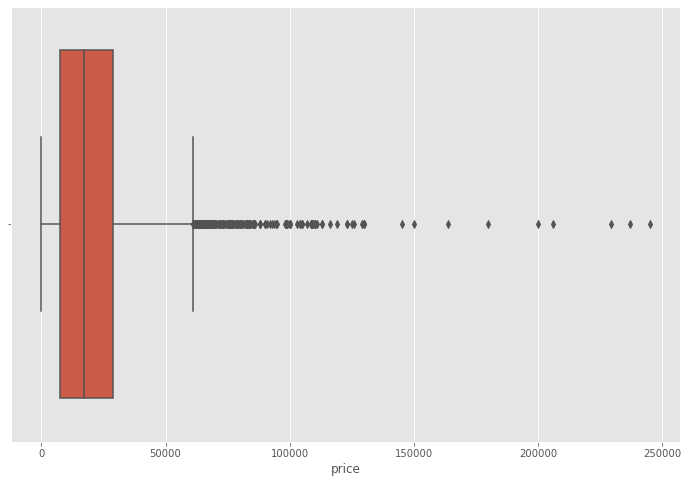

In [24]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.boxplot(df.price)

In [25]:
descrepancy = IQR = df.price.describe()
IQR = descrepancy['75%'] - descrepancy['25%']
IQR

21477.75

In [26]:
thresh = IQR*1.5
thresh

32216.625

In [27]:
descrepancy = IQR = df.price.describe()
IQR = descrepancy['75%'] - descrepancy['25%']
thresh = IQR*1.5
df = df[df.price < thresh]
df.head(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,county,lat,long
0,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,NaN,fwd,mid-size,mini-van,blue,NaN,32.6142,-85.3264
1,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,1GKKNLLS2JZ178034,fwd,NaN,other,white,NaN,32.59,-85.48
2,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,gas,61087.0,clean,other,3LN6L2G99DR819673,fwd,NaN,sedan,red,NaN,32.59,-85.48
3,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,gas,18041.0,clean,other,1GKKNMLS2HZ305977,fwd,NaN,other,NaN,NaN,32.59,-85.48
4,20590.0,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,gas,36436.0,clean,other,3LN6L5A97HR666209,fwd,NaN,sedan,NaN,NaN,32.59,-85.48
5,20000.0,2011.0,ford,f-150 king ranch 4x4,good,8 cylinders,gas,101000.0,clean,automatic,NaN,4wd,NaN,pickup,black,NaN,32.5475,-85.4682
6,26990.0,2015.0,lexus,nx 200t sport utility 4d,good,NaN,gas,29738.0,clean,other,JTJYARBZ9F2013419,fwd,NaN,hatchback,red,NaN,32.59,-85.48
7,27590.0,2016.0,lexus,nx 200t sport utility 4d,good,NaN,gas,31363.0,clean,other,JTJYARBZ5G2041512,fwd,NaN,hatchback,white,NaN,32.59,-85.48
8,22990.0,2020.0,buick,encore gx select sport,good,NaN,other,5144.0,clean,other,KL4MMDSL8LB104338,NaN,NaN,other,red,NaN,32.59,-85.48
10,15500.0,2004.0,toyota,NaN,NaN,NaN,gas,60000.0,clean,automatic,NaN,NaN,NaN,mini-van,blue,NaN,32.5475,-85.4682


In [28]:
df.shape

(20229, 18)

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

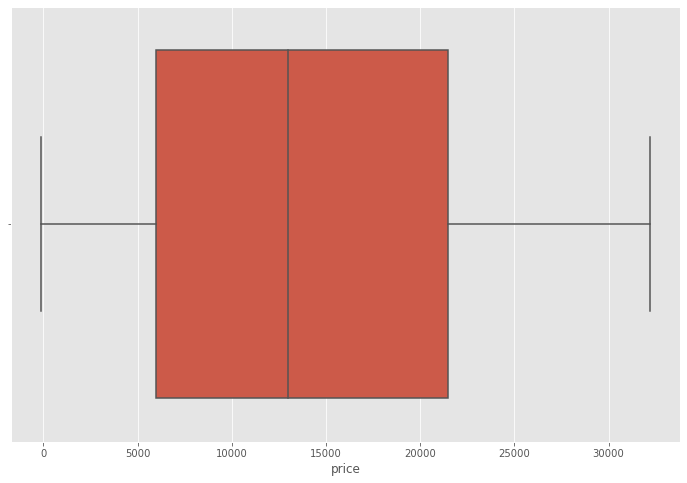

In [29]:
plt.style.use('ggplot')
plt.figure(figsize = (12,8))
sns.boxplot(df.price)

In [30]:
df[['odometer','year']]

,odometer,year
0,30376.0,2003.0
1,20736.0,2018.0
2,61087.0,2013.0
3,18041.0,2017.0
4,36436.0,2017.0
...,...,...
25052,77287.0,2013.0
25053,27917.0,2018.0
25054,107614.0,2013.0
25055,159052.0,2014.0


In [31]:
x= df['year'].unique()
x

array([2003., 2018., 2013., 2017., 2011., 2015., 2016., 2020., 2004.,
       2008., 2007., 2005., 2019., 1966., 2006., 2012., 2014., 2009.,
       1977., 2001., 1996., 2010., 1976., 1957., 1978., 2000., 1952.,
       1997., 1999., 2021., 1988., 2002., 1963., 1970., 1987., 1991.,
       1969., 1998., 1968., 1985., 1995., 1986.,   nan, 1993., 1903.,
       1994., 1990., 1967., 1984., 1989., 1932., 1965., 1992., 1937.,
       1979., 1982., 1948., 1955., 1973., 1947., 1971., 1972., 1964.,
       1983., 1956., 1962., 1927., 1930., 1958., 1981., 1949., 1980.,
       1951., 1975., 1974., 1959., 1922., 1923., 1928., 1954., 1933.,
       1960., 2022., 1934., 1940., 1938., 1926., 1919., 1929., 1953.,
       1941., 1936., 1961., 1939., 1946., 1950., 1942., 1931.])

In [32]:
y= df['year'].nunique()
y

97

In [33]:
x.sort()
x

array([1903., 1919., 1922., 1923., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1936., 1937., 1938., 1939., 1940.,
       1941., 1942., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2018., 2019., 2020., 2021., 2022.,   nan])

In [34]:
df.year.value_counts()

2017.0    1719
2018.0    1663
2014.0    1504
2015.0    1499
2013.0    1494
          ... 
1926.0       1
1927.0       1
1941.0       1
1931.0       1
1903.0       1
Name: year, Length: 97, dtype: int64

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

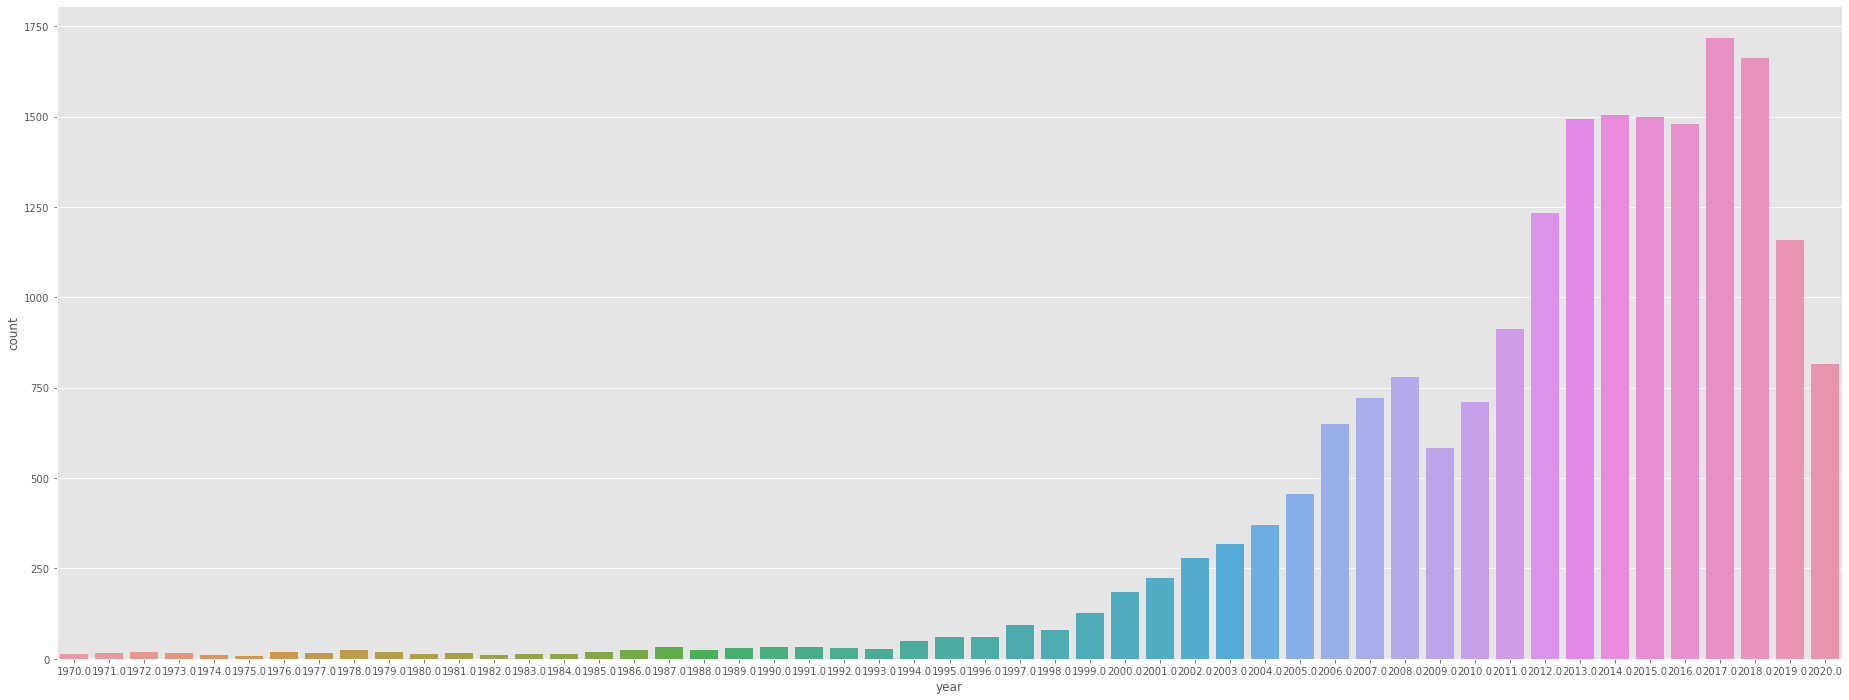

In [35]:
plt.style.use("ggplot")
plt.figure(figsize=(32,12))
sns.countplot(df[df.year.between(1970,2020)].year)

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

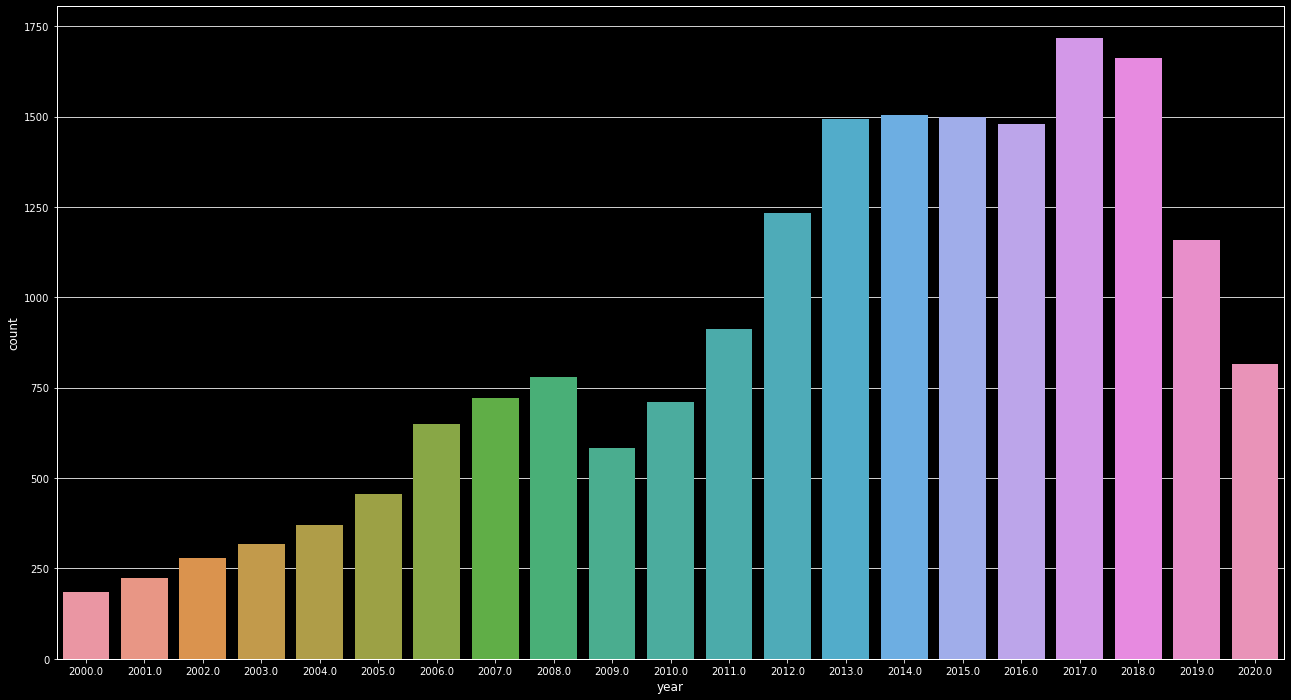

In [36]:
plt.style.use("dark_background")
plt.figure(figsize=(22,12))
sns.countplot(df[df.year.between(2000,2020)].year)

In [37]:
df = df[df.year.between(1903,2022)]
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,county,lat,long
0,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,NaN,fwd,mid-size,mini-van,blue,NaN,32.6142,-85.3264
1,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,1GKKNLLS2JZ178034,fwd,NaN,other,white,NaN,32.59,-85.48
2,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,gas,61087.0,clean,other,3LN6L2G99DR819673,fwd,NaN,sedan,red,NaN,32.59,-85.48
3,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,gas,18041.0,clean,other,1GKKNMLS2HZ305977,fwd,NaN,other,NaN,NaN,32.59,-85.48
4,20590.0,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,gas,36436.0,clean,other,3LN6L5A97HR666209,fwd,NaN,sedan,NaN,NaN,32.59,-85.48


In [38]:
df.odometer.value_counts()

100000.0    95
200000.0    92
1.0         71
150000.0    67
105000.0    64
            ..
136140.0     1
83427.0      1
72110.0      1
112628.0     1
19975.0      1
Name: odometer, Length: 10313, dtype: int64

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

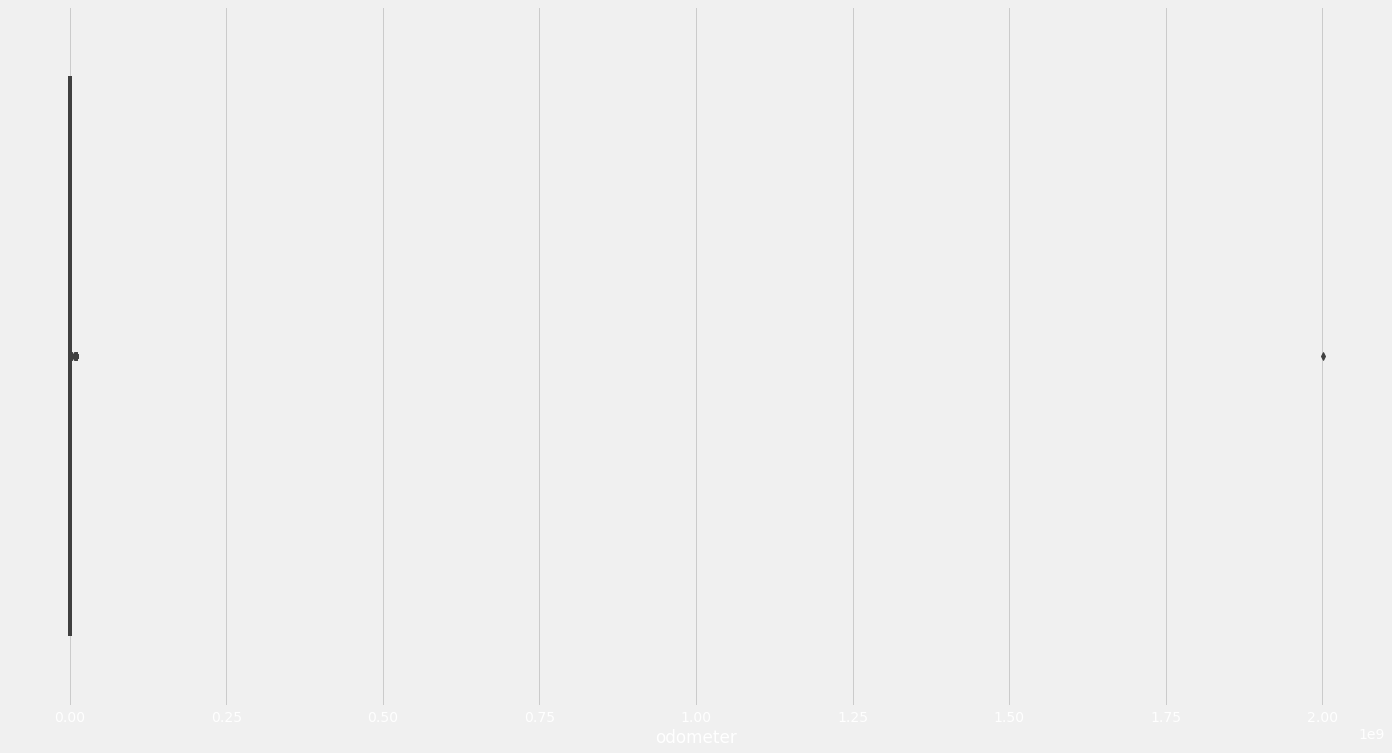

In [39]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(22,12))
sns.boxplot(df.odometer)

In [40]:
IQR = df.odometer.quantile(0.75) - df.odometer.quantile(0.25)
IQR

91137.0

In [41]:
thresh = IQR*1.5
thresh

136705.5

In [42]:
IQR = df.odometer.quantile(0.75) - df.odometer.quantile(0.25)
thresh = IQR*1.5
df = df[df.odometer < thresh]
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,county,lat,long
0,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,NaN,fwd,mid-size,mini-van,blue,NaN,32.6142,-85.3264
1,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,1GKKNLLS2JZ178034,fwd,NaN,other,white,NaN,32.59,-85.48
2,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,gas,61087.0,clean,other,3LN6L2G99DR819673,fwd,NaN,sedan,red,NaN,32.59,-85.48
3,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,gas,18041.0,clean,other,1GKKNMLS2HZ305977,fwd,NaN,other,NaN,NaN,32.59,-85.48
4,20590.0,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,gas,36436.0,clean,other,3LN6L5A97HR666209,fwd,NaN,sedan,NaN,NaN,32.59,-85.48


In [43]:
df.shape

(15292, 18)

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

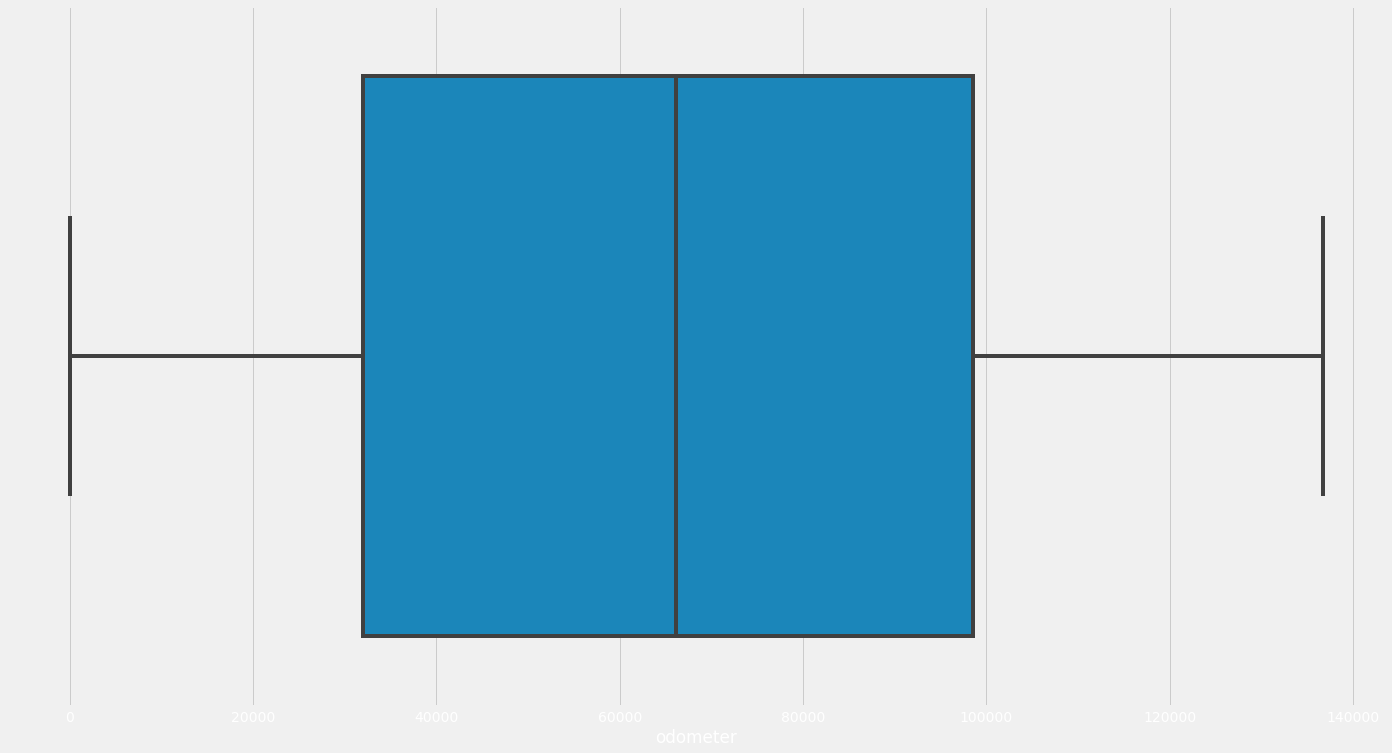

In [44]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(22,12))
sns.boxplot(df.odometer)

In [45]:
top_manufacturer = df.manufacturer.value_counts()
top_manufacturer

chevrolet          2074
ford               1962
toyota             1240
nissan              899
honda               715
jeep                703
dodge               619
bmw                 543
kia                 501
hyundai             478
gmc                 444
ram                 420
volkswagen          409
mercedes-benz       406
lexus               317
subaru              295
cadillac            253
chrysler            247
buick               246
infiniti            245
audi                241
lincoln             193
mazda               192
mini                181
acura               180
mitsubishi          162
volvo                85
fiat                 73
jaguar               71
pontiac              67
alfa-romeo           61
rover                56
mercury              35
porsche              31
tesla                29
saturn               18
datsun                4
harley-davidson       4
ferrari               2
land rover            1
Name: manufacturer, dtype: int64

In [46]:
top_manufacturer = df.manufacturer.value_counts(dropna = False)[:10]
top_manufacturer[:10]

chevrolet    2074
ford         1962
toyota       1240
nissan        899
honda         715
jeep          703
dodge         619
NaN           590
bmw           543
kia           501
Name: manufacturer, dtype: int64

<AxesSubplot:>

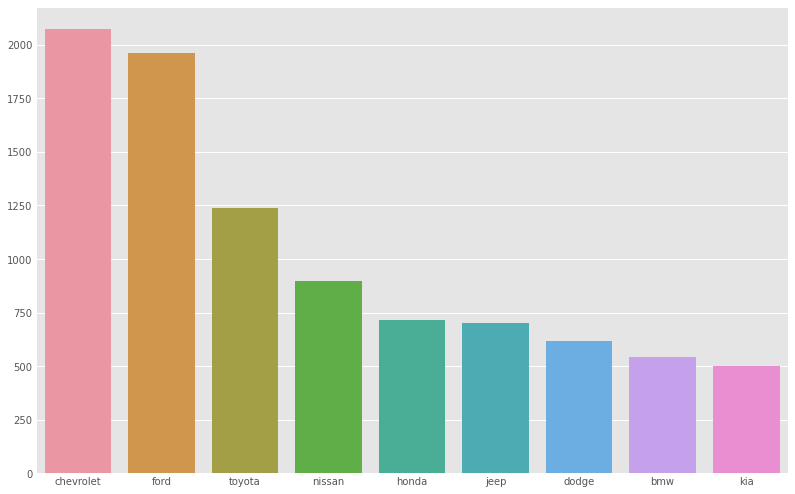

In [47]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.barplot(x=top_manufacturer.index, y=top_manufacturer.values)

In [48]:
df = df.dropna(subset=['lat','long'])
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,county,lat,long
0,9500.0,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,NaN,fwd,mid-size,mini-van,blue,NaN,32.6142,-85.3264
1,28990.0,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,1GKKNLLS2JZ178034,fwd,NaN,other,white,NaN,32.59,-85.48
2,16590.0,2013.0,lincoln,mkz sedan 4d,good,NaN,gas,61087.0,clean,other,3LN6L2G99DR819673,fwd,NaN,sedan,red,NaN,32.59,-85.48
3,28990.0,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,gas,18041.0,clean,other,1GKKNMLS2HZ305977,fwd,NaN,other,NaN,NaN,32.59,-85.48
4,20590.0,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,gas,36436.0,clean,other,3LN6L5A97HR666209,fwd,NaN,sedan,NaN,NaN,32.59,-85.48


<AxesSubplot:>

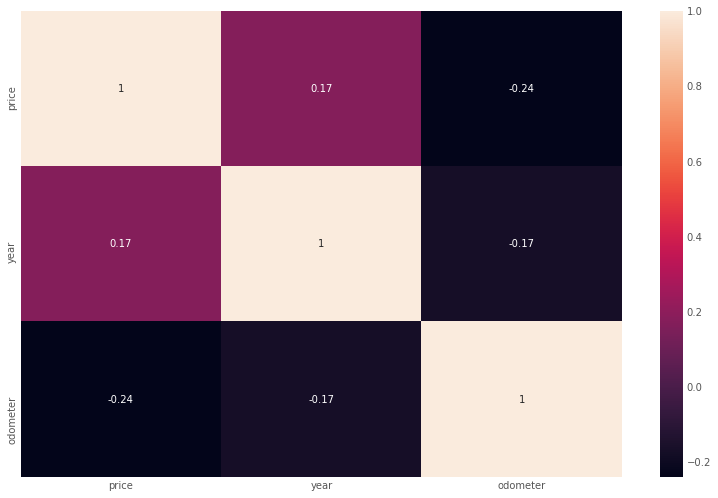

In [49]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)